# Data Fitting 
##### Philip Antonopoulos July 2021
When you have a dataset you have certain discrete points. It would be helful to the data analysis if you could find a function which fit the data. To do that you use fitting. To see if the fit is good, you use the goodness of fit metric. This metric is defined as follows: <br>
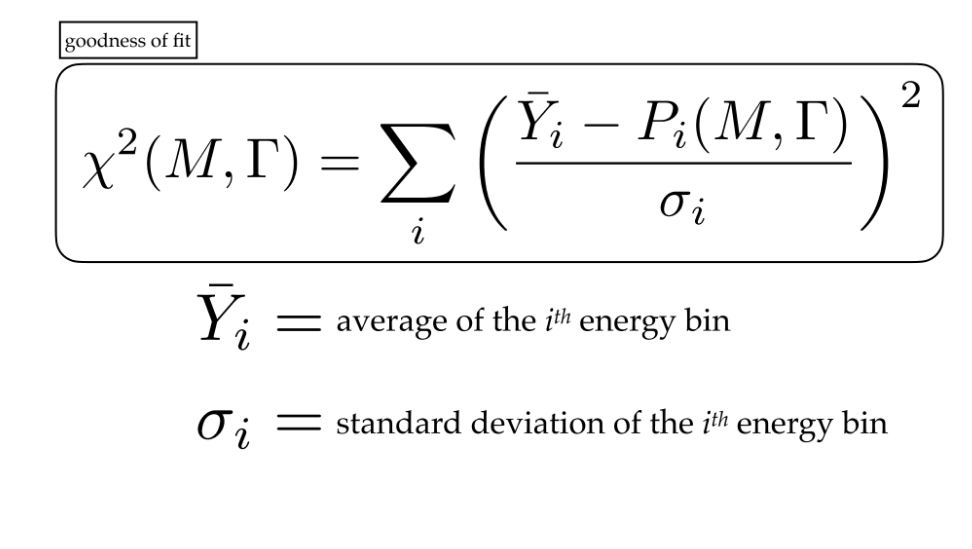

### Pi is the function we are using to fit the data and Yi is a metric of the data itself(the mean value at that point). 



* To find the set of parameters that are the best fit for the data we have to run an optimization routine. I am using the nelder-mead one from the scipy library's optimise function.
* Another useful function for the chi squared is the summing over parts of a list function of numpy(np.sum). 

* Fit the data "constant_fit_data" to a constant. The data consists of three columns one for the x, one for the y at the x and one for the sigma at the x. 

 final_simplex: (array([[999.94373322],
       [999.94363785]]), array([11.03327159, 11.03327168]))
           fun: 11.033271590379105
       message: 'Optimization terminated successfully.'
          nfev: 40
           nit: 20
        status: 0
       success: True
             x: array([999.94373322])


Text(0.5, 1.0, 'The graph of the chi squared function')

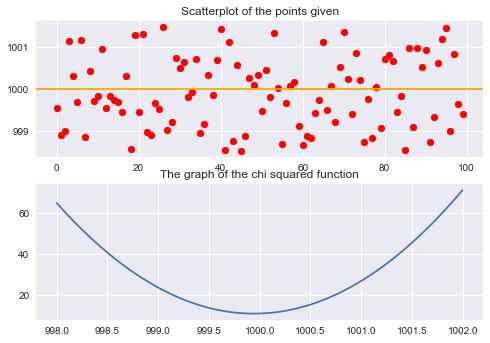

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 
plt.style.use('seaborn')
fig ,(ax1,ax2)= plt.subplots(nrows = 2,ncols = 1)
data = np.loadtxt("constant_fit_data.txt")

#print(data)

#data[0,2]
data = np.transpose(data)
x, y, sigs = data

ax1.scatter(x,y,color = 'red')
ax1.axhline(1000,color = 'orange')


def chi2(c):
    chi = np.sum(((y-c)/sigs)**2)
    return chi

c_guess = 1000

c_best = np.array(optimize.minimize(chi2,c_guess, method = 'nelder-mead'))

print(c_best)
#c_best


chi2(999.94373322)
ys = []
xs = np.arange(998,1002,0.001)
for i in xs:
    ys.append(chi2(i))
    
ax2.plot(xs,ys)

ax1.set_title("Scatterplot of the points given")
ax2.set_title("The graph of the chi squared function")



Fit the data from "linedata" to a line of form a+bx. Same data format.<br>
$\chi ^2(a,b) = \Sigma (\frac{y-(b+ax)}{\sigma})^2$

798.6984055810058


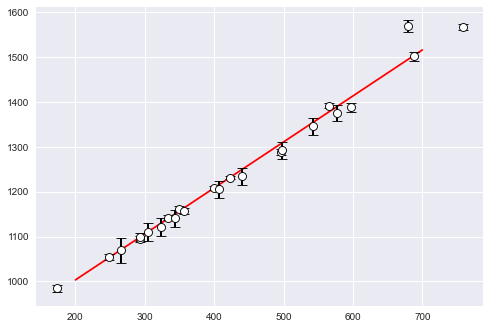

In [174]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import optimize
plt.style.use('seaborn')

data = np.transpose(np.loadtxt("linedata.txt"))
x, y, sigs = data

fig, ax1 = plt.subplots(nrows = 1, ncols = 1)
ax1.errorbar(x, y, yerr= sigs, markersize=8,fmt='o',color='k',mfc='white',mec='k', elinewidth=2, capsize=5, mew=0.9,zorder=5)

def chi(a_b):
    a,b = a_b
    chi = np.sum(((y-b-a*x)/sigs)**2)
    return chi

const_guess = [0.9,1000]
chi_0 = optimize.minimize(chi,const_guess, method = 'nelder-mead')
chi_0.x


a = chi_0.x[0]
b = chi_0.x[1]
a = a.item()
b = b.item()
xs = [200,700]

def line(a,b,mpi):
    return a+mpi*b



print(b)
ax1.plot([200,700],[1003.4287545031044,1515.254626808351], color = 'red')



    

Fit data bw into a Breit Wigner Distribution. Then determine the mass and the width of the state. <br>
$\chi ^2(M,G) = \Sigma (\frac{y-(Breit Wigner Distribution(M,G))}{\sigma})^2$


The mass of the system is:  4.000677435944878 eV
The width of resonance of the system is:  1.4987389589946436 1/sec


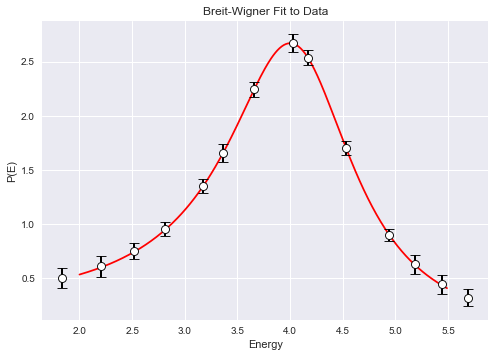

In [180]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import optimize
plt.style.use('seaborn')

data = np.transpose(np.loadtxt("bw.txt"))
x, y, sigs = data

def Breit_Wigner(E,M,G):
    prob = (M**3  * G)/(( (E**2) - (M**2) )**2 + ( (M**2) * (G**2)) )
    return prob


plt.errorbar(x, y, yerr= sigs, markersize=8,fmt='o',color='k',mfc='white',mec='k', elinewidth=2, capsize=5, mew=0.9,zorder=5)

def chi(M_G):
    M, G = M_G
    chi = np.sum( ((y-Breit_Wigner(x,M,G)) / sigs)**2 )
    return chi

Mg_guess = [2.5,3]
c_best = optimize.minimize(chi, Mg_guess, method = 'nelder-mead')
c_best 

M = c_best.x[0]
G = c_best.x[1]
M = M.item()
G = G.item()

xall = np.arange(2,5.5,0.01)
plt.plot(xall, Breit_Wigner(xall,M,G), color = 'red')
plt.title("Breit-Wigner Fit to Data")
plt.xlabel("Energy")
plt.ylabel("P(E)")

print("The mass of the system is: ", M , "eV")
print("The width of resonance of the system is: ", G, "1/sec")
